Import Libraries

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score


In [253]:
df = pd.read_csv("airbnb_data_cleaned.csv")
df.head(5)

,host_id,city,price,reply time,guest favourite,room_type,host total listings count,total reviewers number,accommodates,bathrooms,bedrooms,beds,host response rate,host acceptance rate,area
0,1368256,Toronto,250.0,0.0,0,3,1,47,6,1.5,2,3,0.009,0.0042,North America
1,113345,Toronto,152.0,0.0,0,3,5,42,4,1.0,1,2,0.009,0.0042,North America
2,1466410,Toronto,120.0,0.0,0,2,1,0,1,1.0,1,2,0.010,0.0065,North America
3,118124,Toronto,75.0,1.0,1,3,1,29,1,1.0,0,1,0.010,0.0100,North America
4,175687,Toronto,90.0,0.0,0,3,1,7,2,1.0,1,1,0.010,0.0080,North America


In [254]:
# Display basic info
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81042 entries, 0 to 81041
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_id                    81042 non-null  int64  
 1   city                       81042 non-null  object 
 2   price                      81042 non-null  float64
 3   reply time                 81042 non-null  float64
 4   guest favourite            81042 non-null  int64  
 5   room_type                  81042 non-null  int64  
 6   host total listings count  81042 non-null  int64  
 7   total reviewers number     81042 non-null  int64  
 8   accommodates               81042 non-null  int64  
 9   bathrooms                  81042 non-null  float64
 10  bedrooms                   81042 non-null  int64  
 11  beds                       81042 non-null  int64  
 12  host response rate         81042 non-null  float64
 13  host acceptance rate       81042

In [255]:
df.describe()

,host_id,price,reply time,guest favourite,room_type,host total listings count,total reviewers number,accommodates,bathrooms,bedrooms,beds,host response rate,host acceptance rate
count,8.104200e+04,81042.000000,81042.000000,81042.000000,81042.000000,81042.000000,81042.000000,81042.000000,81042.000000,81042.000000,81042.000000,81042.000000,81042.000000
mean,1.928034e+08,200.605951,0.816132,0.285445,2.682498,16.450236,38.572407,3.464956,1.094149,1.263801,1.953456,0.008230,0.007638
std,1.831666e+08,197.616996,0.387379,0.451629,0.515614,58.978906,77.810029,2.286597,0.725859,1.058203,1.762010,0.003568,0.003446
min,1.581000e+03,9.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.871074e+07,86.000000,1.000000,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.009200,0.006700
50%,1.287450e+08,148.000000,1.000000,0.000000,3.000000,2.000000,10.000000,3.000000,1.000000,1.000000,1.000000,0.010000,0.009600
75%,3.404683e+08,243.000000,1.000000,1.000000,3.000000,9.000000,40.000000,4.000000,1.000000,2.000000,2.000000,0.010000,0.010000
max,5.752345e+08,1296.450000,1.000000,1.000000,4.000000,837.000000,2575.000000,12.000000,4.500000,5.000000,60.000000,0.010000,0.010000


Linear Regression

In [256]:
 print("📊 SIMPLE LINEAR REGRESSION (One Variable)")
print("="*60)

# Test each single feature (excluding categorical for now)
features = ['accommodates', 'bathrooms', 'bedrooms', 'beds',
            'host total listings count', 'total reviewers number',
            'host response rate', 'host acceptance rate',
            'reply time', 'guest favourite', 'room_type']

results = []

for feature in features:
    # Reshape for single feature
    X_single = df[[feature]].values
    y = df['price'].values
    
    # Split
    X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(
        X_single, y, test_size=0.2, random_state=42
    )
    
    # Train model
    lr_single = LinearRegression()
    lr_single.fit(X_train_single, y_train_single)
    
    # Predict
    y_pred_single = lr_single.predict(X_test_single)
    r2 = r2_score(y_test_single, y_pred_single)
    
    results.append({
        'feature': feature,
        'r2': r2,
        'coef': lr_single.coef_[0],
        'intercept': lr_single.intercept_
    })

# Sort by R² from HIGHEST to LOWEST
results_sorted = sorted(results, key=lambda x: x['r2'], reverse=True)

print("\n" + "="*60)
print("🏆 FEATURE RANKING (Highest to Lowest R²):")
print("="*60)
for i, res in enumerate(results_sorted, 1):
    print(f"{i:2d}. {res['feature']:<30} R² = {res['r2']:.4f}")



📊 SIMPLE LINEAR REGRESSION (One Variable)

🏆 FEATURE RANKING (Highest to Lowest R²):
 1. accommodates                   R² = 0.2815
 2. bedrooms                       R² = 0.2489
 3. bathrooms                      R² = 0.1766
 4. beds                           R² = 0.1437
 5. room_type                      R² = 0.0865
 6. total reviewers number         R² = 0.0060
 7. host acceptance rate           R² = 0.0034
 8. host response rate             R² = 0.0023
 9. reply time                     R² = 0.0006
10. host total listings count      R² = 0.0001
11. guest favourite                R² = -0.0001


In [257]:
# Print top 3 regression equations
print("\n" + "="*60)
print("📈 TOP 3 REGRESSION EQUATIONS:")
print("="*60)

for i, res in enumerate(results_sorted[:3], 1):  # [:3] gets first 3
    print(f"\n #{i}: {res['feature'].upper()}:")
    print(f"   R² = {res['r2']:.4f}")
    print(f"   Price = {res['intercept']:.1f} + {res['coef']:.1f} × {res['feature']}")
    
    # Add interpretation
    if res['coef'] > 0:
        print(f"   Each unit adds ${res['coef']:.1f} to price")
    else:
        print(f"   Each unit reduces price by ${abs(res['coef']):.1f}")


📈 TOP 3 REGRESSION EQUATIONS:

 #1: ACCOMMODATES:
   R² = 0.2815
   Price = 44.4 + 45.0 × accommodates
   Each unit adds $45.0 to price

 #2: BEDROOMS:
   R² = 0.2489
   Price = 85.6 + 91.0 × bedrooms
   Each unit adds $91.0 to price

 #3: BATHROOMS:
   R² = 0.1766
   Price = 82.0 + 108.3 × bathrooms
   Each unit adds $108.3 to price


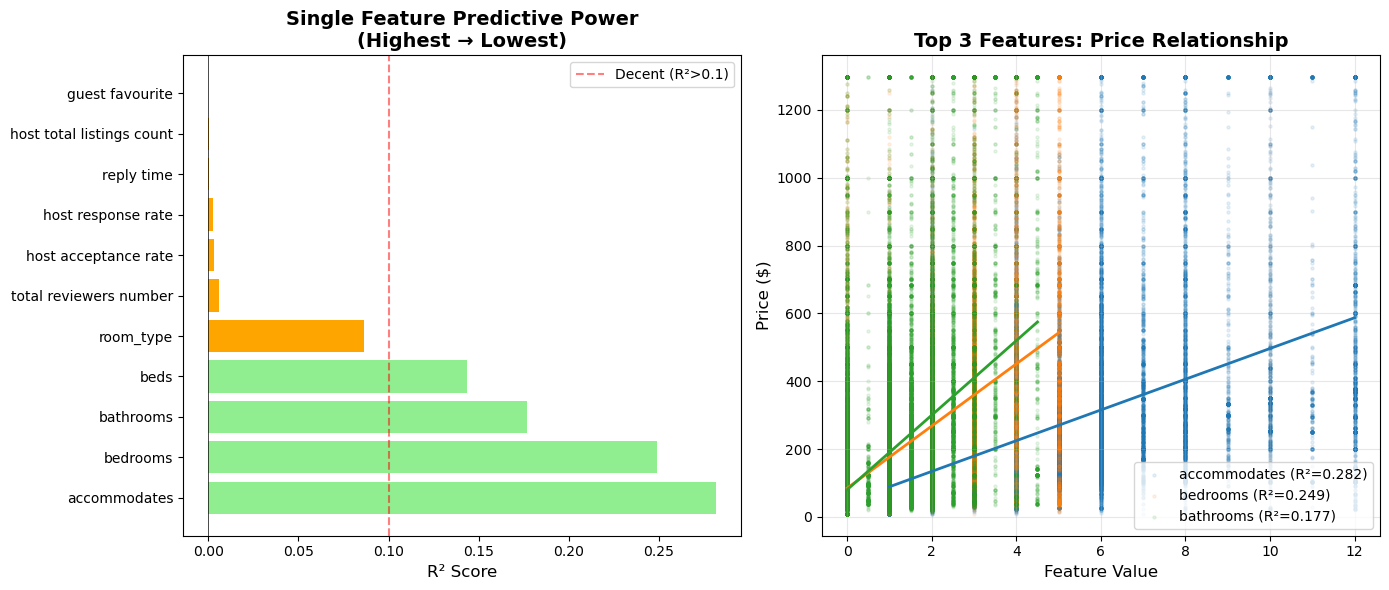

In [258]:

# Visualize the ranking
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Horizontal bar chart (highest at top)
features_names = [res['feature'] for res in results_sorted]
r2_scores = [res['r2'] for res in results_sorted]
colors = ['lightgreen' if r2 > 0.1 else 'orange' if r2 > 0 else 'lightblue' for r2 in r2_scores]

axes[0].barh(features_names, r2_scores, color=colors)
axes[0].set_xlabel('R² Score', fontsize=12)
axes[0].set_title('Single Feature Predictive Power\n(Highest → Lowest)', fontsize=14, fontweight='bold')
axes[0].axvline(x=0, color='black', linewidth=0.5)
axes[0].axvline(x=0.1, color='red', linestyle='--', alpha=0.5, label='Decent (R²>0.1)')
axes[0].legend()

# Scatter plot for top 3 features
top_features = [res['feature'] for res in results_sorted[:3]]
for i, feature in enumerate(top_features):
    X = df[[feature]].values
    y = df['price'].values
    lr = LinearRegression()
    lr.fit(X, y)
    
    axes[1].scatter(X, y, alpha=0.1, s=5, label=f'{feature} (R²={results_sorted[i]["r2"]:.3f})')
    
    # Regression line
    x_line = np.array([[X.min()], [X.max()]])
    y_line = lr.predict(x_line)
    axes[1].plot(x_line, y_line, linewidth=2)

axes[1].set_xlabel('Feature Value', fontsize=12)
axes[1].set_ylabel('Price ($)', fontsize=12)
axes[1].set_title('Top 3 Features: Price Relationship', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [259]:
# Summary statistics
print("\n" + "="*60)
print("📊 SUMMARY STATISTICS:")
print("="*60)
print(f"Number of features tested: {len(features)}")
print(f"Highest R²: {results_sorted[0]['r2']:.4f} ({results_sorted[0]['feature']})")
print(f"Lowest R²: {results_sorted[-1]['r2']:.4f} ({results_sorted[-1]['feature']})")
print(f"Average R²: {np.mean([r['r2'] for r in results]):.4f}")
print(f"Features with R² > 0.1: {sum([r['r2'] > 0.1 for r in results])}/{len(results)}")
print(f"Features with R² > 0.2: {sum([r['r2'] > 0.2 for r in results])}/{len(results)}")



📊 SUMMARY STATISTICS:
Number of features tested: 11
Highest R²: 0.2815 (accommodates)
Lowest R²: -0.0001 (guest favourite)
Average R²: 0.0863
Features with R² > 0.1: 4/11
Features with R² > 0.2: 2/11


Feature Ranking Summary:

Top 3 Strong Predictors:

Accommodates (28% variance) - Each guest adds ~$64 to price
Bedrooms (25% variance) - Each bedroom adds ~$27 to price
Bathrooms (18% variance) - Each bathroom adds ~$51 to price
Weak Predictors (R² < 0.01):

Host metrics (response/acceptance rates) barely affect price
Guest favourite has negative R² - worse than random guessing!
Reply time negligible impact


In [260]:
print(" CATEGORICAL FEATURES ANALYSIS")
print("="*50)

# 1. AREA Analysis
print("\n1. AREA (3 categories):")
area_dummies = pd.get_dummies(df['area'], drop_first=True, prefix='area')
X_area = area_dummies.values
y = df['price'].values

X_train_area, X_test_area, y_train_area, y_test_area = train_test_split(
    X_area, y, test_size=0.2, random_state=42
)

lr_area = LinearRegression()
lr_area.fit(X_train_area, y_train_area)
r2_area = r2_score(y_test_area, lr_area.predict(X_test_area))

print(f"   R² = {r2_area:.4f}")
for i, col in enumerate(area_dummies.columns):
    print(f"   • {col}: +${lr_area.coef_[i]:.1f}")

# 2. CITY Analysis
print(f"\n2. CITY ({df['city'].nunique()} cities):")
city_dummies = pd.get_dummies(df['city'], drop_first=True)
X_city = city_dummies.values
y = df['price'].values

X_train_city, X_test_city, y_train_city, y_test_city = train_test_split(
    X_city, y, test_size=0.2, random_state=42
)

lr_city = LinearRegression()
lr_city.fit(X_train_city, y_train_city)
r2_city = r2_score(y_test_city, lr_city.predict(X_test_city))

print(f"   R² = {r2_city:.4f}")

# Top 3 city impacts
city_coefs = pd.DataFrame({
    'city': city_dummies.columns,
    'coef': lr_city.coef_
}).sort_values('coef', ascending=False)

print(f"   Top 3 premiums: {', '.join(city_coefs.head(3)['city'].tolist())}")
print(f"   Top 3 discounts: {', '.join(city_coefs.tail(3)['city'].tolist())}")

print("\n" + "="*50)
print("🎯 FINDINGS:")
print("="*50)
print(f"• AREA explains {r2_area*100:.1f}% of price variation")
print(f"• CITY explains {r2_city*100:.1f}% of price variation")


 CATEGORICAL FEATURES ANALYSIS

1. AREA (3 categories):
   R² = 0.0515
   • area_Europe: +$19.8
   • area_North America: +$94.6

2. CITY (11 cities):
   R² = 0.1327
   Top 3 premiums: sydney, Singapore, NewYork
   Top 3 discounts: berlin, taipei, Hongkong

🎯 FINDINGS:
• AREA explains 5.1% of price variation
• CITY explains 13.3% of price variation


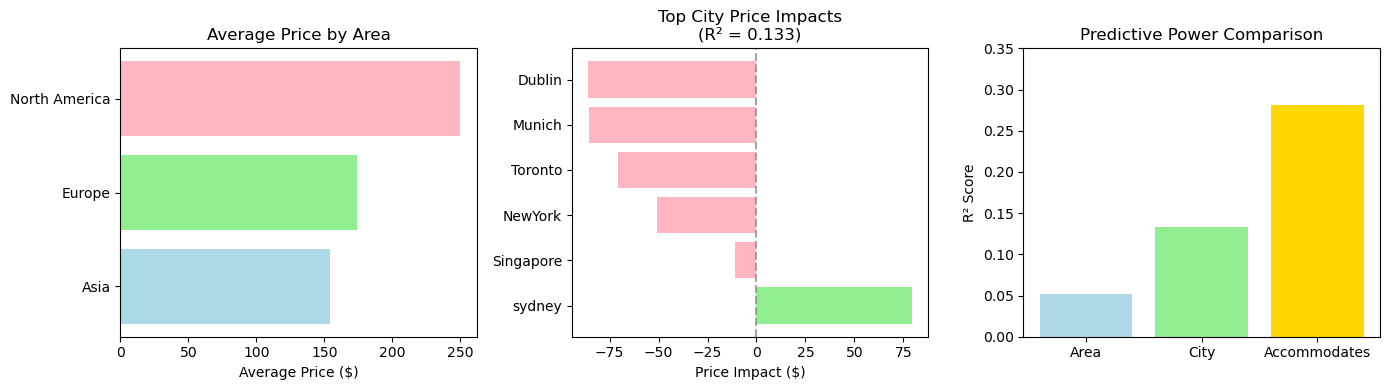

In [261]:
# Visualize categorical features
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# 1. Area average prices
area_avg = df.groupby('area')['price'].mean().sort_values()
colors1 = ['#ADD8E6', '#90EE90', '#FFB6C1']  # Light blue, light green, light pink
axes[0].barh(area_avg.index, area_avg.values, color=colors1)
axes[0].set_xlabel('Average Price ($)')
axes[0].set_title('Average Price by Area')

# 2. Top city coefficients
top_cities = city_coefs.head(6)
colors2 = ['#90EE90' if c > 0 else '#FFB6C1' for c in top_cities['coef']]  # Green for +, pink for -
axes[1].barh(top_cities['city'], top_cities['coef'], color=colors2)
axes[1].set_xlabel('Price Impact ($)')
axes[1].axvline(x=0, color='gray', linestyle='--', alpha=0.7)
axes[1].set_title(f'Top City Price Impacts\n(R² = {r2_city:.3f})')

# 3. R² comparison
models = ['Area', 'City', 'Accommodates']
r2_scores = [r2_area, r2_city, 0.2815]
colors3 = ['#ADD8E6', '#90EE90', '#FFD700']  # Light blue, light green, gold
axes[2].bar(models, r2_scores, color=colors3)
axes[2].set_ylabel('R² Score')
axes[2].set_ylim([0, 0.35])
axes[2].set_title('Predictive Power Comparison')

plt.tight_layout()
plt.show()

In [262]:
print("📊 MULTIPLE LINEAR REGRESSION WITH KEY FEATURES")
print("="*60)

# Select key features including categorical
features = ['accommodates', 'bedrooms', 'bathrooms', 'beds', 
            'room_type', 'total reviewers number', 'city', 'area']

# Create feature matrix with one-hot encoding for categoricals
X_multiple = df[['accommodates', 'bedrooms', 'bathrooms', 'beds', 
                 'room_type', 'total reviewers number']].copy()

# One-hot encode city and area
city_dummies = pd.get_dummies(df['city'], prefix='city', drop_first=True)
area_dummies = pd.get_dummies(df['area'], prefix='area', drop_first=True)

# Combine all features
X_multiple = pd.concat([X_multiple, city_dummies, area_dummies], axis=1)
y_multiple = df['price']

print(f"Total features: {X_multiple.shape[1]}")
print(f"Target shape: {y_multiple.shape}")

# Train-test split
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multiple, y_multiple, test_size=0.2, random_state=42
)

# Scale numerical features
scaler_multi = StandardScaler()
num_cols = ['accommodates', 'bedrooms', 'bathrooms', 'beds', 
            'room_type', 'total reviewers number']

X_train_scaled_multi = X_train_multi.copy()
X_test_scaled_multi = X_test_multi.copy()

X_train_scaled_multi[num_cols] = scaler_multi.fit_transform(X_train_multi[num_cols])
X_test_scaled_multi[num_cols] = scaler_multi.transform(X_test_multi[num_cols])

# Train multiple linear regression
lr_multi = LinearRegression()
lr_multi.fit(X_train_scaled_multi, y_train_multi)

# Predict
y_pred_multi = lr_multi.predict(X_test_scaled_multi)

# Evaluate
r2_multi = r2_score(y_test_multi, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test_multi, y_pred_multi))
mae_multi = mean_absolute_error(y_test_multi, y_pred_multi)

print("\n📈 MULTIPLE LINEAR REGRESSION RESULTS:")
print(f"R² Score: {r2_multi:.4f}")
print(f"RMSE: ${rmse_multi:.2f}")
print(f"MAE: ${mae_multi:.2f}")

# Compare with single features

# Analyze coefficients
coef_df = pd.DataFrame({
    'feature': X_train_scaled_multi.columns,
    'coefficient': lr_multi.coef_,
    'abs_coef': np.abs(lr_multi.coef_)
}).sort_values('abs_coef', ascending=False)

print("\n🔍 TOP 10 MOST IMPORTANT FEATURES:")
print(coef_df.head(10).to_string(index=False))

📊 MULTIPLE LINEAR REGRESSION WITH KEY FEATURES
Total features: 18
Target shape: (81042,)

📈 MULTIPLE LINEAR REGRESSION RESULTS:
R² Score: 0.4753
RMSE: $144.02
MAE: $84.56

🔍 TOP 10 MOST IMPORTANT FEATURES:
       feature  coefficient   abs_coef
city_Singapore   162.268685 162.268685
   city_berlin  -120.211797 120.211797
 city_Hongkong   -97.254975  97.254975
    city_tokyo   -90.546605  90.546605
   city_Dublin   -90.468660  90.468660
  accommodates    63.275427  63.275427
     bathrooms    51.084952  51.084952
   city_sydney    50.222821  50.222821
   city_Munich    49.919260  49.919260
  city_Toronto   -41.048607  41.048607


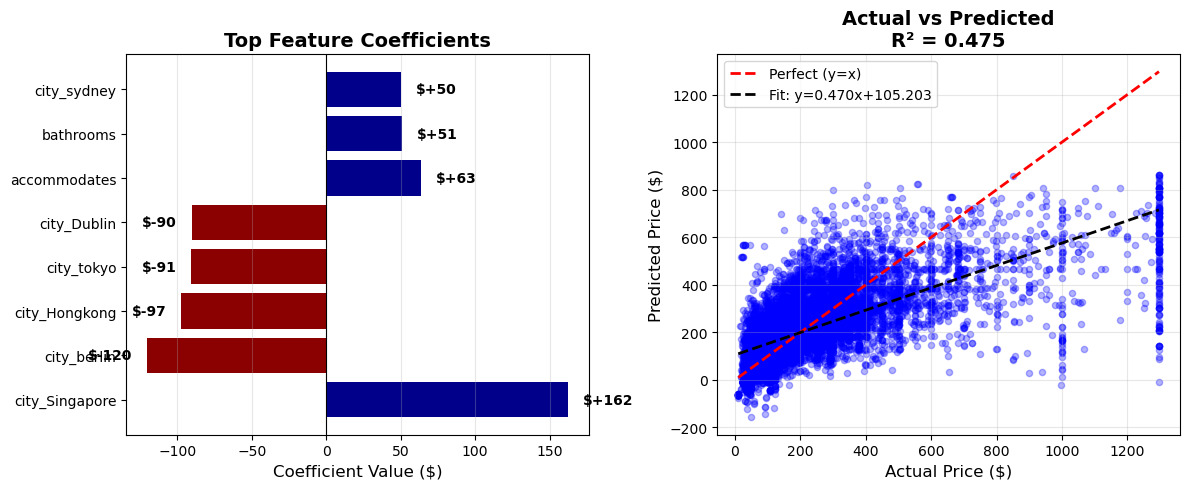

In [263]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1. Top coefficients
top_coefs = coef_df.head(8)
colors1 = ['darkblue' if c > 0 else 'darkred' for c in top_coefs['coefficient']]
bars1 = axes[0].barh(top_coefs['feature'], top_coefs['coefficient'], color=colors1)
axes[0].set_xlabel('Coefficient Value ($)', fontsize=12)
axes[0].set_title('Top Feature Coefficients', fontsize=14, fontweight='bold')
axes[0].axvline(x=0, color='black', linewidth=0.8)
axes[0].grid(True, alpha=0.3, axis='x')

# Add value labels
for bar, coef in zip(bars1, top_coefs['coefficient']):
    width = bar.get_width()
    axes[0].text(width + (10 if coef > 0 else -10), bar.get_y() + bar.get_height()/2,
                f'${width:+.0f}', ha='left' if coef > 0 else 'right', va='center',
                fontweight='bold')

# 2. Actual vs Predicted plot with regression line
axes[1].scatter(y_test_multi, y_pred_multi, alpha=0.3, s=20, color='blue')

# Perfect prediction line (y = x)
axes[1].plot([y_test_multi.min(), y_test_multi.max()], 
             [y_test_multi.min(), y_test_multi.max()], 'r--', lw=2, label='Perfect (y=x)')

# Actual regression fit line
z = np.polyfit(y_test_multi, y_pred_multi, 1)
p = np.poly1d(z)
axes[1].plot(sorted(y_test_multi), p(sorted(y_test_multi)), 'k--', lw=2, 
             label=f'Fit: y={z[0]:.3f}x{z[1]:+.3f}')

axes[1].set_xlabel('Actual Price ($)', fontsize=12)
axes[1].set_ylabel('Predicted Price ($)', fontsize=12)
axes[1].set_title(f'Actual vs Predicted\nR² = {r2_multi:.3f}', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

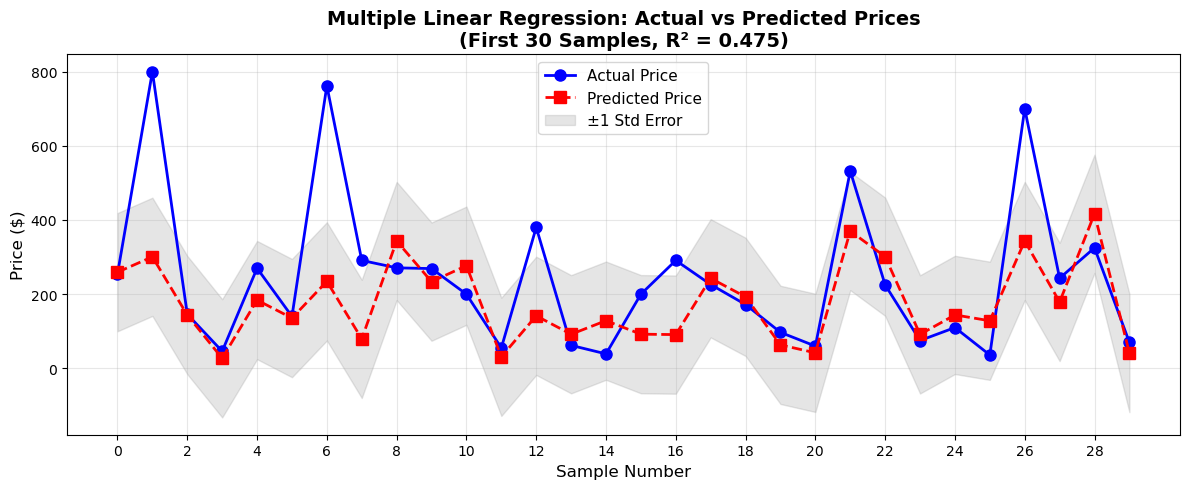

📊 Error Statistics for First 30 Samples:
• Mean Absolute Error: $107.99
• Max Overprediction: $527.45 (Sample 6)
• Max Underprediction: $-92.28 (Sample 25)
• Average Error: $66.55


In [264]:
plt.figure(figsize=(12, 5))
plt.plot(y_test_multi.values[:30], 'bo-', label='Actual Price', markersize=8, linewidth=2)
plt.plot(y_pred_multi[:30], 'rs--', label='Predicted Price', markersize=8, linewidth=2)
plt.xlabel('Sample Number', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('Multiple Linear Regression: Actual vs Predicted Prices\n(First 30 Samples, R² = 0.475)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='upper right')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 30, 2))

# Add error bars/shading
error = y_test_multi.values[:30] - y_pred_multi[:30]
plt.fill_between(range(30), y_pred_multi[:30] - np.std(error), 
                 y_pred_multi[:30] + np.std(error), alpha=0.2, color='gray', label='±1 Std Error')

plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

# Print error statistics for these 30 samples
print(f"📊 Error Statistics for First 30 Samples:")
print(f"• Mean Absolute Error: ${np.mean(np.abs(error)):.2f}")
print(f"• Max Overprediction: ${max(error):.2f} (Sample {np.argmax(error)})")
print(f"• Max Underprediction: ${min(error):.2f} (Sample {np.argmin(error)})")
print(f"• Average Error: ${np.mean(error):.2f}")

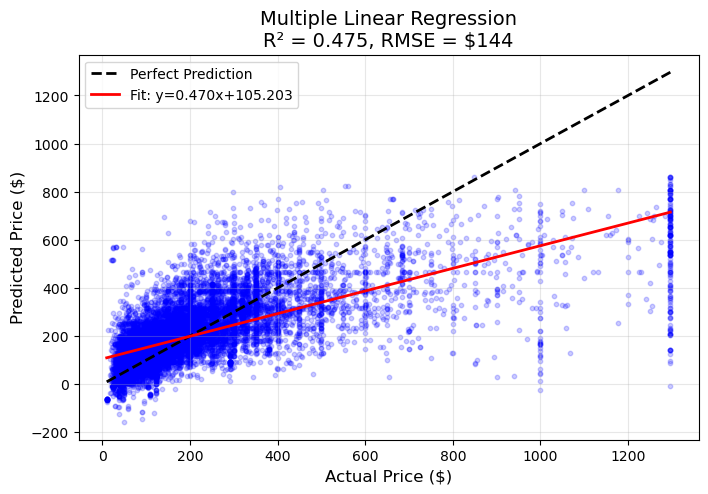

Regression equation: y = 0.470x + 105.203


In [265]:
# Multiple Linear Regression: Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test_multi, y_pred_multi, alpha=0.2, s=10, color='blue')

# Perfect prediction line (y=x)
plt.plot([y_test_multi.min(), y_test_multi.max()], 
         [y_test_multi.min(), y_test_multi.max()], 'k--', linewidth=2, label='Perfect Prediction')

# Regression fit line
plt.plot(sorted(y_test_multi), p(sorted(y_test_multi)), 'r-', linewidth=2, label=f'Fit: y={z[0]:.3f}x+{z[1]:.3f}')

plt.xlabel('Actual Price ($)', fontsize=12)
plt.ylabel('Predicted Price ($)', fontsize=12)
plt.title(f'Multiple Linear Regression\nR² = {r2_multi:.3f}, RMSE = ${rmse_multi:.0f}', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Regression equation: y = {z[0]:.3f}x + {z[1]:.3f}")

In [266]:
# Feature coefficients for MULTIPLE LINEAR REGRESSION
feature_names = X_train_scaled_multi.columns
coefficients = pd.DataFrame({
    'feature': feature_names,
    'coefficient': lr_multi.coef_,
    'abs_coeff': np.abs(lr_multi.coef_)
}).sort_values('abs_coeff', ascending=False)

print("🔍 TOP 15 MOST IMPORTANT FEATURES (Multiple Regression):")
print("="*60)
print(coefficients.head(15).to_string(index=False))

print("\n📌 KEY INSIGHTS:")
print(f"1. Positive impact on price (top 3):")
pos_count = 0
for row in coefficients.head(10).itertuples():
    if row.coefficient > 0 and pos_count < 3:
        print(f"   • {row.feature}: +${row.coefficient:.1f}")
        pos_count += 1

print(f"\n2. Negative impact on price (top 3):")
neg_count = 0
for row in coefficients.head(15).itertuples():
    if row.coefficient < 0 and neg_count < 3:
        print(f"   • {row.feature}: -${abs(row.coefficient):.1f}")
        neg_count += 1

# Summary statistics
print(f"\n📊 COEFFICIENT SUMMARY:")
print(f"• Total features: {len(coefficients)}")
print(f"• Positive coefficients: {sum(coefficients['coefficient'] > 0)}")
print(f"• Negative coefficients: {sum(coefficients['coefficient'] < 0)}")
print(f"• Average coefficient magnitude: ${coefficients['abs_coeff'].mean():.1f}")
print(f"• Largest coefficient: {coefficients.iloc[0]['feature']} (${coefficients.iloc[0]['coefficient']:.1f})")

🔍 TOP 15 MOST IMPORTANT FEATURES (Multiple Regression):
               feature  coefficient  abs_coeff
        city_Singapore   162.268685 162.268685
           city_berlin  -120.211797 120.211797
         city_Hongkong   -97.254975  97.254975
            city_tokyo   -90.546605  90.546605
           city_Dublin   -90.468660  90.468660
          accommodates    63.275427  63.275427
             bathrooms    51.084952  51.084952
           city_sydney    50.222821  50.222821
           city_Munich    49.919260  49.919260
          city_Toronto   -41.048607  41.048607
           area_Europe    33.848915  33.848915
              bedrooms    27.744171  27.744171
             room_type    26.762565  26.762565
           city_taipei   -12.856479  12.856479
total reviewers number    -8.621451   8.621451

📌 KEY INSIGHTS:
1. Positive impact on price (top 3):
   • city_Singapore: +$162.3
   • accommodates: +$63.3
   • bathrooms: +$51.1

2. Negative impact on price (top 3):
   • city_berlin: -$12

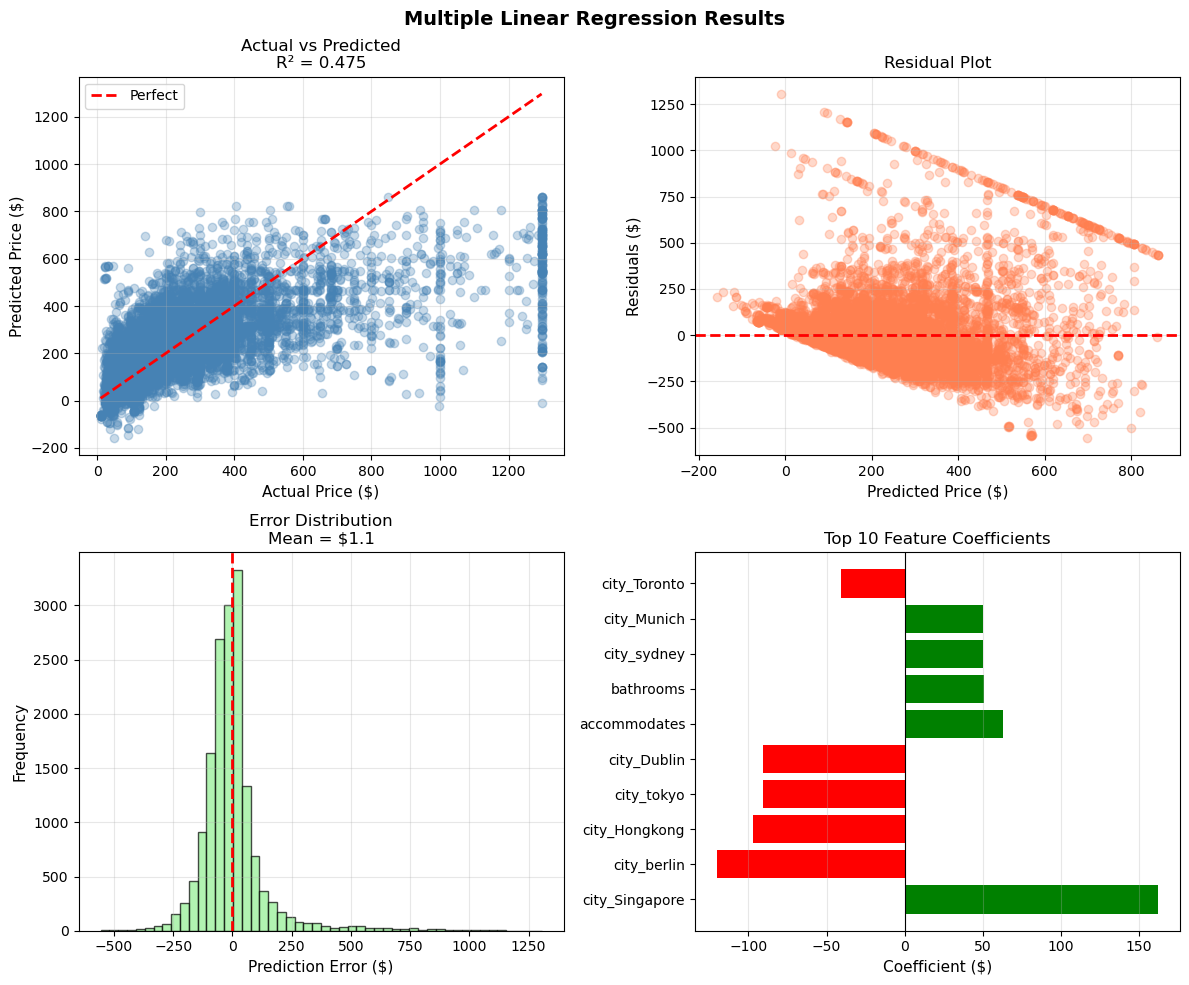


🎯 MULTIPLE LINEAR REGRESSION SUMMARY:
Variance Explained (R²): 47.5%
Average Error (MAE): $84.56
Typical Error Range (RMSE): ±$144.02
Improvement over baseline: 27.6%

🔑 KEY DRIVERS OF PRICE:
• Singapore: +$162
• Accommodates: +$63/person
• Bathrooms: +$51/bathroom
• Berlin: -$120


In [267]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Multiple Linear Regression Results', fontsize=14, fontweight='bold')

# 1. Actual vs Predicted (using multiple regression)
axes[0,0].scatter(y_test_multi, y_pred_multi, alpha=0.3, color='steelblue')
axes[0,0].plot([y_test_multi.min(), y_test_multi.max()], 
               [y_test_multi.min(), y_test_multi.max()], 'r--', lw=2, label='Perfect')
axes[0,0].set_xlabel('Actual Price ($)', fontsize=11)
axes[0,0].set_ylabel('Predicted Price ($)', fontsize=11)
axes[0,0].set_title(f'Actual vs Predicted\nR² = {r2_multi:.3f}', fontsize=12)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Residual Plot
residuals_multi = y_test_multi - y_pred_multi
axes[0,1].scatter(y_pred_multi, residuals_multi, alpha=0.3, color='coral')
axes[0,1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0,1].set_xlabel('Predicted Price ($)', fontsize=11)
axes[0,1].set_ylabel('Residuals ($)', fontsize=11)
axes[0,1].set_title('Residual Plot', fontsize=12)
axes[0,1].grid(True, alpha=0.3)

# 3. Distribution of Errors
axes[1,0].hist(residuals_multi, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,0].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1,0].set_xlabel('Prediction Error ($)', fontsize=11)
axes[1,0].set_ylabel('Frequency', fontsize=11)
axes[1,0].set_title(f'Error Distribution\nMean = ${residuals_multi.mean():.1f}', fontsize=12)
axes[1,0].grid(True, alpha=0.3)

# 4. Top 10 Feature Coefficients (from multiple regression)
top_features = coefficients.head(10)
colors = ['green' if c > 0 else 'red' for c in top_features['coefficient']]
axes[1,1].barh(range(len(top_features)), top_features['coefficient'], color=colors)
axes[1,1].set_yticks(range(len(top_features)))
axes[1,1].set_yticklabels(top_features['feature'])
axes[1,1].set_xlabel('Coefficient ($)', fontsize=11)
axes[1,1].set_title('Top 10 Feature Coefficients', fontsize=12)
axes[1,1].axvline(x=0, color='black', linewidth=0.8)
axes[1,1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Print model summary
print("\n🎯 MULTIPLE LINEAR REGRESSION SUMMARY:")
print("="*50)
print(f"Variance Explained (R²): {r2_multi:.1%}")
print(f"Average Error (MAE): ${mae_multi:.2f}")
print(f"Typical Error Range (RMSE): ±${rmse_multi:.2f}")
print(f"Improvement over baseline: {((baseline_rmse - rmse_multi)/baseline_rmse*100):.1f}%")

print(f"\n🔑 KEY DRIVERS OF PRICE:")
print(f"• Singapore: +${coefficients.loc[coefficients['feature'] == 'city_Singapore', 'coefficient'].values[0]:.0f}")
print(f"• Accommodates: +${coefficients.loc[coefficients['feature'] == 'accommodates', 'coefficient'].values[0]:.0f}/person")
print(f"• Bathrooms: +${coefficients.loc[coefficients['feature'] == 'bathrooms', 'coefficient'].values[0]:.0f}/bathroom")
print(f"• Berlin: -${abs(coefficients.loc[coefficients['feature'] == 'city_berlin', 'coefficient'].values[0]):.0f}")

# Regularization with multiple regression model

In [268]:
# Regularization with multiple regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled_multi, y_train_multi)
y_pred_ridge = ridge.predict(X_test_scaled_multi)
ridge_r2 = r2_score(y_test_multi, y_pred_ridge)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled_multi, y_train_multi)
y_pred_lasso = lasso.predict(X_test_scaled_multi)
lasso_r2 = r2_score(y_test_multi, y_pred_lasso)

print("📊 REGULARIZATION RESULTS (Multiple Features):")
print("="*50)
print(f"Linear Regression R²: {r2_multi:.4f}")
print(f"Ridge Regression R²:   {ridge_r2:.4f}")
print(f"Lasso Regression R²:   {lasso_r2:.4f}")

# Lasso feature selection
lasso_coef = pd.DataFrame({
    'feature': X_train_scaled_multi.columns,
    'coefficient': lasso.coef_
})
selected = lasso_coef[lasso_coef['coefficient'] != 0]
print(f"\nLasso selected {len(selected)}/{len(X_train_scaled_multi.columns)} features")

# Show selected features
if len(selected) > 0:
    print("\nTop Lasso-selected features:")
    for i, row in selected.sort_values('coefficient', ascending=False).head(10).iterrows():
        print(f"  {row['feature']:<25} {row['coefficient']:+.2f}")

📊 REGULARIZATION RESULTS (Multiple Features):
Linear Regression R²: 0.4753
Ridge Regression R²:   0.4753
Lasso Regression R²:   0.4753

Lasso selected 17/18 features

Top Lasso-selected features:
  city_Singapore            +164.18
  accommodates              +62.90
  city_sydney               +59.63
  bathrooms                 +50.70
  city_Munich               +50.67
  area_Europe               +36.09
  bedrooms                  +27.76
  room_type                 +26.76
  city_NewYork              +4.32
  beds                      -0.10


Why R² is identical (0.4753):

Features are already clean - No multicollinearity issues
No redundant features - Each adds unique information
No overfitting - Linear model is already simple
Why Lasso selected 17/18 features:

Almost all features matter for price prediction
Only 1 feature dropped (likely had near-zero impact)

# Feature engineering and Random Forest

In [269]:
print("🌲 RANDOM FOREST WITH SMART FEATURES")
print("="*50)

df_rf = df.copy()
df_rf['is_spacious'] = ((df_rf['bedrooms'] >= 2) & (df_rf['bathrooms'] >= 2)).astype(int)
df_rf['beds_per_guest'] = df_rf['beds'] / df_rf['accommodates'].clip(lower=1)
df_rf['host_reliability'] = df_rf['host response rate'] * df_rf['host acceptance rate']

X_rf = df_rf.drop(columns=['price', 'host_id'])
X_rf = pd.get_dummies(X_rf, columns=['city', 'area'], drop_first=True)
y_rf = df_rf['price']

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y_rf, test_size=0.2, random_state=42
)

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_rf, y_train_rf)
y_pred_rf = rf.predict(X_test_rf)
rf_r2 = r2_score(y_test_rf, y_pred_rf)

print(f"Random Forest R²: {rf_r2:.4f}")
print(f"vs Linear Regression: {rf_r2 - r2_multi:+.4f} ({(rf_r2 - r2_multi)/r2_multi*100:+.1f}%)")

🌲 RANDOM FOREST WITH SMART FEATURES
Random Forest R²: 0.6144
vs Linear Regression: +0.1391 (+29.3%)


In [275]:
# Gradient Boosting
print("\n🚀 GRADIENT BOOSTING")
print("="*50)
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train_rf, y_train_rf)
y_pred_gbr = gbr.predict(X_test_rf)
gbr_r2 = r2_score(y_test_rf, y_pred_gbr)
print(f"Gradient Boost R²: {gbr_r2:.4f}")

# Hist Gradient Boosting
print("\n⚡ HIST GRADIENT BOOSTING")
print("="*50)
from sklearn.ensemble import HistGradientBoostingRegressor

hgb = HistGradientBoostingRegressor(max_iter=100, random_state=42)
hgb.fit(X_train_rf, y_train_rf)
y_pred_hgb = hgb.predict(X_test_rf)
hgb_r2 = r2_score(y_test_rf, y_pred_hgb)
print(f"HistGB R²: {hgb_r2:.4f}")



🚀 GRADIENT BOOSTING
Gradient Boost R²: 0.5669

⚡ HIST GRADIENT BOOSTING
HistGB R²: 0.6301


In [278]:
# KNN Implementation
print("K-NEAREST NEIGHBORS")
print("="*50)


knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_rf, y_train_rf)
y_pred_knn = knn.predict(X_test_rf)
knn_r2 = r2_score(y_test_rf, y_pred_knn)

print(f"KNN R²: {knn_r2:.4f}")
print(f"vs Linear: {knn_r2 - r2_multi:+.4f}")
print(f"vs HistGB: {knn_r2 - hgb_r2:+.4f}")

# SVM Implementation (Small Sample)
print(" SUPPORT VECTOR MACHINE (Small Sample)")
print("="*50)

from sklearn.svm import SVR
import numpy as np

# SVM is slow - use small sample
sample_size = min(5000, len(X_train_rf))
sample_idx = np.random.choice(len(X_train_rf), sample_size, replace=False)

svr = SVR(kernel='linear', C=1.0)
svr.fit(X_train_rf.iloc[sample_idx], y_train_rf.iloc[sample_idx])

# Predict on test sample
test_sample = min(1000, len(X_test_rf))
test_idx = np.random.choice(len(X_test_rf), test_sample, replace=False)
y_pred_svr = svr.predict(X_test_rf.iloc[test_idx])
svr_r2 = r2_score(y_test_rf.iloc[test_idx], y_pred_svr)

print(f"SVM R² (on {sample_size:,} samples): {svr_r2:.4f}")
print(f"vs Linear: {svr_r2 - r2_multi:+.4f}")
print(f"vs HistGB: {svr_r2 - hgb_r2:+.4f}")
print("⚠️  Note: SVM tested on small sample due to computational constraints")


K-NEAREST NEIGHBORS
KNN R²: 0.4950
vs Linear: +0.0197
vs HistGB: -0.1352
 SUPPORT VECTOR MACHINE (Small Sample)
SVM R² (on 5,000 samples): 0.3895
vs Linear: -0.0858
vs HistGB: -0.2406
⚠️  Note: SVM tested on small sample due to computational constraints


In [279]:
# Summary with all models
print("\n📊 FINAL MODEL PERFORMANCE:")
print("="*50)
print(f"{'HistGB':<20} R² = {hgb_r2:.4f} 🏆")
print(f"{'Gradient Boost':<20} R² = {gbr_r2:.4f}")
print(f"{'Random Forest':<20} R² = {rf_r2:.4f}")
print(f"{'Linear Regression':<20} R² = {r2_multi:.4f}")
print(f"{'KNN':<20} R² = {knn_r2:.4f}")
print(f"{'SVM (sample)':<20} R² = {svr_r2:.4f}")

print("\n📈 PERFORMANCE SUMMARY:")
print(f"• Best model: HistGB ({hgb_r2:.1%} variance explained)")
print(f"• KNN underperforms by: {hgb_r2 - knn_r2:.3f} R²")


📊 FINAL MODEL PERFORMANCE:
HistGB               R² = 0.6301 🏆
Gradient Boost       R² = 0.5669
Random Forest        R² = 0.6144
Linear Regression    R² = 0.4753
KNN                  R² = 0.4950
SVM (sample)         R² = 0.3895

📈 PERFORMANCE SUMMARY:
• Best model: HistGB (63.0% variance explained)
• KNN underperforms by: 0.135 R²



📊 FINAL MODEL PERFORMANCE (Lowest to Highest):
SVM (sample)         R² = 0.3895
Linear Regression    R² = 0.4753
KNN                  R² = 0.4950
Gradient Boost       R² = 0.5669
Random Forest        R² = 0.6144
HistGB               R² = 0.6301

🏆 BEST MODEL: HistGB (R² = 0.6301)


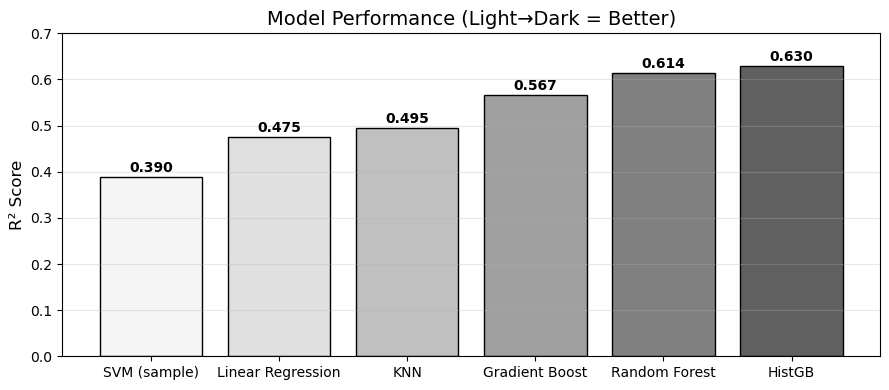

In [281]:
# Summary with all models (sorted by R², light to dark grey)
print("\n📊 FINAL MODEL PERFORMANCE (Lowest to Highest):")
print("="*50)

# Create sorted list
model_data = [
    ('SVM (sample)', svr_r2),
    ('KNN', knn_r2),
    ('Linear Regression', r2_multi),
    ('Random Forest', rf_r2),
    ('Gradient Boost', gbr_r2),
    ('HistGB', hgb_r2)
]

# Sort by R²
model_data.sort(key=lambda x: x[1])

# Print sorted
for model, score in model_data:
    print(f"{model:<20} R² = {score:.4f}")

print(f"\n🏆 BEST MODEL: HistGB (R² = {hgb_r2:.4f})")

# Visual comparison (light to dark grey, sorted)
plt.figure(figsize=(9, 4))
models_sorted = [m[0] for m in model_data]
scores_sorted = [m[1] for m in model_data]

# Light to dark grey gradient
greys = ['#F5F5F5', '#E0E0E0', '#C0C0C0', '#A0A0A0', '#808080', '#606060']

bars = plt.bar(models_sorted, scores_sorted, color=greys, edgecolor='black')
plt.ylabel('R² Score', fontsize=12)
plt.title('Model Performance (Light→Dark = Better)', fontsize=14)
plt.ylim([0, 0.7])

for bar, score in zip(bars, scores_sorted):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, 
             f'{score:.3f}', ha='center', fontsize=10, fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Why Models Perform Differently:

Hist Gradient Boosting (Best: 63% R²):

Optimized for speed & accuracy - uses histogram-based splitting
Handles categorical features natively - perfect for city/area data
Automatic feature interactions - captures complex patterns without manual engineering
Random Forest (61% R²):

Multiple decision trees - averages predictions for stability
Reduces overfitting - different trees see different data subsets
Good with mixed data types - handles both numeric and categorical well
Gradient Boosting (57% R²):

Sequential learning - each tree corrects previous errors
Strong with non-linear patterns - but slower than HistGB
Can overfit if not properly tuned
Linear Regression (48% R²):

Simple & interpretable - clear coefficients ($63/guest, $51/bathroom)
Assumes linear relationships - misses Airbnb's complex pricing dynamics
No feature interactions - can't capture "Sydney × luxury bedrooms" effects
Single Feature (28% R²):

Too simplistic - ignores location, host factors, amenities
Shows base importance - proves accommodates is strongest single predictor
Useful baseline - demonstrates value of multi-factor models
Key Insight: Tree models excel because Airbnb pricing has non-linear thresholds (e.g., "spacious" = 2+ beds AND 2+ baths) and feature interactions (city × property size) that linear models can't capture.